In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt

11490434/11490434 [==============================] - 2s 0us/step


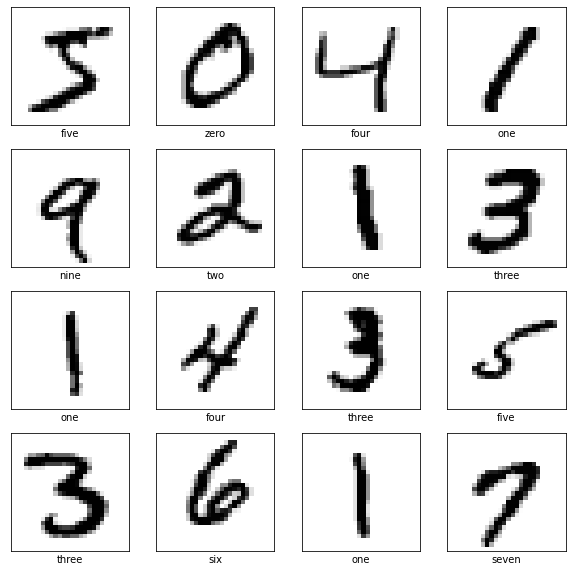

In [2]:
# Download MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

class_names = ['zero', 'one', 'two', 'three', 'four', 'five',
               'six', 'seven', 'eight', 'nine']

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [3]:
# Preprocessing the data
train_images = train_images.reshape(60000, 28, 28, 1).astype('float32') / 255.0
test_images = test_images.reshape(10000, 28, 28, 1).astype('float32') / 255.0

In [4]:
# Buidling CNN
model = models.Sequential()
# model.add(layers.Conv2D(25, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.Conv2D(25, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(50, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 25)        250       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 25)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 50)        11300     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 50)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1800)              0         
                                                                 
 dense (Dense)               (None, 100)               1

In [5]:
# from_logits = False if you set the activation function as softmax in the last dense layer

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 16s 4ms/step - loss: 0.1354 - accuracy: 0.9580 - val_loss: 0.0437 - val_accuracy: 0.9851
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0436 - accuracy: 0.9865 - val_loss: 0.0535 - val_accuracy: 0.9820
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0315 - accuracy: 0.9900 - val_loss: 0.0341 - val_accuracy: 0.9889
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0222 - accuracy: 0.9928 - val_loss: 0.0346 - val_accuracy: 0.9895
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0181 - accuracy: 0.9940 - val_loss: 0.0312 - val_accuracy: 0.9889
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0126 - accuracy: 0.9960 - val_loss: 0.0385 - val_accuracy: 0.9896
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0117 - accuracy: 0.9962 - val_loss: 0.0326 - val_accuracy

313/313 - 1s - loss: 0.0465 - accuracy: 0.9886 - 791ms/epoch - 3ms/step
0.9886000156402588


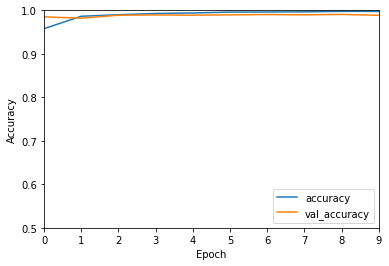

In [6]:
# Evaluate the CNN Model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xlim([0, 9])
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)